In [1]:
import requests
import pandas as pd

API_KEY = "e79fb67e829144c66828471ab9d07dd9"   # replace this

lat = 17.3850   # Hyderabad (you can change)
lon = 78.4867

url = "http://api.openweathermap.org/data/2.5/air_pollution"

params = {
    "lat": lat,
    "lon": lon,
    "appid": API_KEY
}

response = requests.get(url, params=params)
data = response.json()

data


{'coord': {'lon': 78.4867, 'lat': 17.385},
 'list': [{'main': {'aqi': 5},
   'components': {'co': 329.5,
    'no': 0.19,
    'no2': 1.65,
    'o3': 149.09,
    'so2': 10.93,
    'pm2_5': 119.54,
    'pm10': 129.72,
    'nh3': 0},
   'dt': 1765786562}]}

In [2]:
df_live = pd.json_normalize(data["list"])
df_live


,dt,main.aqi,components.co,components.no,components.no2,components.o3,components.so2,components.pm2_5,components.pm10,components.nh3
0,1765786562,5,329.5,0.19,1.65,149.09,10.93,119.54,129.72,0


In [3]:
df_live["Latitude"] = 17.3850
df_live["Longitude"] = 78.4867
df_live["Coverage"] = "Approx. 1 km radius"
df_live["Data_Type"] = "Real-Time Physical Data"
df_live


,dt,main.aqi,components.co,components.no,components.no2,components.o3,components.so2,components.pm2_5,components.pm10,components.nh3,Latitude,Longitude,Coverage,Data_Type
0,1765786562,5,329.5,0.19,1.65,149.09,10.93,119.54,129.72,0,17.385,78.4867,Approx. 1 km radius,Real-Time Physical Data


In [4]:
df_live["datetime"] = pd.to_datetime(df_live["dt"], unit="s")
df_live


,dt,main.aqi,components.co,components.no,components.no2,components.o3,components.so2,components.pm2_5,components.pm10,components.nh3,Latitude,Longitude,Coverage,Data_Type,datetime
0,1765786562,5,329.5,0.19,1.65,149.09,10.93,119.54,129.72,0,17.385,78.4867,Approx. 1 km radius,Real-Time Physical Data,2025-12-15 08:16:02


In [5]:
df_live.to_csv("realtime_air_pollution_1km.csv", index=False)


In [7]:
import os
os.listdir()


['.anaconda',
 '.conda',
 '.condarc',
 '.config',
 '.continuum',
 '.eclipse',
 '.gitconfig',
 '.gradle',
 '.idlerc',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.lesshst',
 '.m2',
 '.matplotlib',
 '.node_repl_history',
 '.p2',
 '.python_history',
 '.sf',
 '.sfdx',
 '.SmartTomcat',
 '.ssh',
 '.streamlit',
 '.viminfo',
 '.vscode',
 '83',
 'anaconda3',
 'anji.txt',
 'anjibabu',
 'AppData',
 'Application Data',
 'chatbot-using-nlp',
 'Contacts',
 'Cookies',
 'dkcghi.py',
 'Documents',
 'Downloads',
 'dvklrvk.py',
 'eclipse-workspace',
 'Favorites',
 'global air pollution dataset.csv',
 'Global air pollution dataset.zip',
 'GLobalAirPollution.ipynb',
 'Hackathon',
 'IdeaProjects',
 'Links',
 'Local Settings',
 'm1.py',
 'm2.py',
 'm3.py',
 'Music',
 'My Documents',
 'my-react',
 'NetHood',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94eaa1}.TM.blf',
 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94eaa1}.TMContainer00000000000000000001

In [8]:
import pandas as pd

df_hist = pd.read_csv("Pollution_Weather_datset.csv")   # historical
df_live = pd.read_csv("realtime_air_pollution_1km.csv") # real-time


In [9]:
hist_cols = ['AQI Value', 'PM2.5 AQI Value']
live_cols = ['main.aqi', 'components.pm2_5']


In [10]:
hist_aqi_mean = df_hist['AQI Value'].mean()
hist_pm25_mean = df_hist['PM2.5 AQI Value'].mean()


In [11]:
live_aqi = df_live['main.aqi'].iloc[0]
live_pm25 = df_live['components.pm2_5'].iloc[0]


In [12]:
print("Historical Avg AQI:", hist_aqi_mean)
print("Real-Time AQI:", live_aqi)

print("Historical Avg PM2.5:", hist_pm25_mean)
print("Real-Time PM2.5:", live_pm25)


Historical Avg AQI: 72.29453432044603
Real-Time AQI: 5
Historical Avg PM2.5: 68.82675258203089
Real-Time PM2.5: 119.54


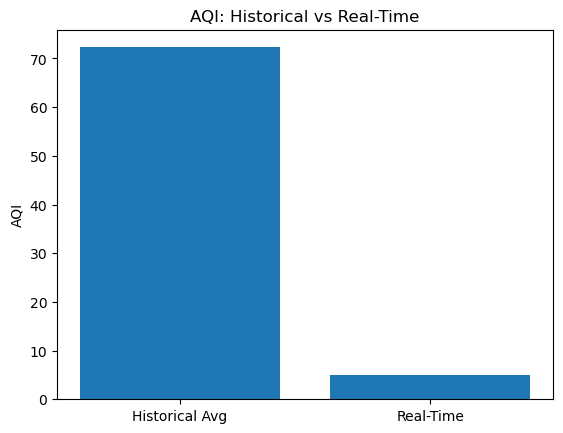

In [13]:
import matplotlib.pyplot as plt

labels = ['Historical Avg', 'Real-Time']
aqi_values = [hist_aqi_mean, live_aqi]

plt.bar(labels, aqi_values)
plt.title("AQI: Historical vs Real-Time")
plt.ylabel("AQI")
plt.show()


In [15]:
cities = df_hist[['City', 'Latitude', 'Longitude']].drop_duplicates().head(50)
cities


,City,Latitude,Longitude
0,Praskoveya,44.7444,44.2031
1,Presidente Dutra,-5.2900,-44.4900
2,Priolo Gargallo,37.1572,15.1802
3,Przasnysz,53.0191,20.8803
4,Punaauia,-17.6333,-149.6000
5,Punta Gorda,26.9298,-82.0454
6,Puttlingen,49.2855,6.8872
7,Puurs,51.0750,4.2900
8,Pyatigorsk,44.0486,43.0594
9,Qalyub,30.1792,31.2056


In [17]:
import requests
import pandas as pd

API_KEY = "e79fb67e829144c66828471ab9d07dd9"

rows = []

for _, row in cities.iterrows():
    lat = row['Latitude']
    lon = row['Longitude']
    city = row['City']
    
    url = "http://api.openweathermap.org/data/2.5/air_pollution"
    params = {
        "lat": lat,
        "lon": lon,
        "appid": API_KEY
    }
    
    response = requests.get(url, params=params).json()
    
    record = response['list'][0]
    flat = pd.json_normalize(record)
    flat['City'] = city
    flat['Latitude'] = lat
    flat['Longitude'] = lon
    
    rows.append(flat)

df_live_multi = pd.concat(rows, ignore_index=True)
df_live_multi


,dt,main.aqi,components.co,components.no,components.no2,components.o3,components.so2,components.pm2_5,components.pm10,components.nh3,City,Latitude,Longitude
0,1765787423,2,160.43,1.52,5.24,70.07,2.34,3.42,4.23,1.12,Praskoveya,44.7444,44.2031
1,1765787424,1,154.76,0.00,0.51,21.67,0.02,1.53,1.63,0.09,Presidente Dutra,-5.2900,-44.4900
2,1765787424,2,156.32,0.05,1.03,94.93,6.47,18.82,21.00,0.00,Priolo Gargallo,37.1572,15.1802
3,1765787425,2,263.50,0.16,15.13,39.73,6.65,24.19,27.10,0.21,Przasnysz,53.0191,20.8803
4,1765787425,1,74.83,0.00,0.45,19.20,0.05,0.72,1.43,0.00,Punaauia,-17.6333,-149.6000
5,1765787426,2,154.35,0.00,1.95,72.69,0.70,5.55,9.75,0.19,Punta Gorda,26.9298,-82.0454
6,1765787427,2,199.04,0.15,7.75,66.81,0.78,16.10,17.75,0.37,Puttlingen,49.2855,6.8872
7,1765787427,2,203.21,0.16,9.07,45.33,0.64,13.55,15.39,0.44,Puurs,51.0750,4.2900
8,1765787428,2,132.56,0.95,3.24,71.93,0.38,1.67,2.24,1.97,Pyatigorsk,44.0486,43.0594
9,1765787429,2,128.90,0.48,1.71,78.94,2.22,11.69,35.81,0.38,Qalyub,30.1792,31.2056


In [18]:
hist_avg = df_hist.groupby('City')[['AQI Value', 'PM2.5 AQI Value']].mean().reset_index()

comparison = hist_avg.merge(
    df_live_multi[['City', 'main.aqi', 'components.pm2_5']],
    on='City',
    how='inner'
)

comparison


,City,AQI Value,PM2.5 AQI Value,main.aqi,components.pm2_5
0,Dalnegorsk,29.0,25.0,2,1.70
1,Dar Es Salaam,51.0,51.0,1,0.53
2,Darbhanga,247.0,247.0,5,208.64
3,Dayton,45.0,45.0,1,8.01
4,Deinze,36.0,36.0,2,14.27
5,Dekernes,81.0,56.0,2,10.18
6,Delmas,124.0,124.0,2,3.61
7,Deming,72.0,72.0,2,15.89
8,Denton,55.0,55.0,1,8.67
9,Destin,31.0,25.0,2,1.32
